## CPE 695 HWK 1 Programming Problem --- Yuhui Ren

In this problem, we write a program to find the coefficients for a linear regression model for the dataset provided (data2.txt). Assume a linear model: y = w0 + w1*x. You need to<br>1) Plot the data (i.e., x-axis for 1st column, y-axis for 2nd column), and use Python to implement the following methods to find the coefficients: <br>
2) Normal equation, and <br>
3) Gradient Descent using <b>batch</b> AND <b>stochastic</b> modes respectively:<br>
a) Determine an appropriate termination condition (e.g., when cost function is less than a threshold, and/or after a given number of iterations).<br>
b) Print the cost function vs. iterations for each mode; compare and discuss batch and stochastic modes in terms of the accuracy and the speed of convergence.<br>
c) Choose a best learning rate. For example, you can plot cost function vs. learning rate to determine the best learning rate.<br>Please implement the algorithms by yoursef and <b>do NOT use the fit() function</b> of the library.

### (1) Plot the Data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'Data')

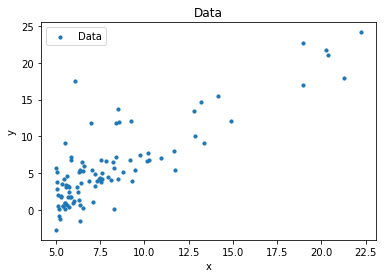

In [2]:
data = np.loadtxt('data2.txt',delimiter=',')

x = data[:,0]
y = data[:,1]

plt.scatter(x, y, s=10, label='Data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')

### (2) Find Coefficients Using Normal Equation

In [31]:
m = len(x)  # number of data

x = np.reshape(x, (m,1))     # make the shape of x to be (m,1) 
y = np.reshape(y, (m,1))     # make the shape of y to be (m,1) 
x_bias = np.ones((m,1))
x_update = np.append(x_bias, x, axis=1) 

x_trans = x_update.T

theta = np.linalg.inv(x_trans.dot(x_update)).dot(x_trans).dot(y)
theta   # coefficients

array([[-3.89578088],
       [ 1.19303364]])

So the linear function should be: <br>
y = -3.896 + 1.193x

### (3.1) Batch Gradient Descent

In [47]:
import time

def linear_regression(x, y, w1_current=0, w0_current=0, learning_rate=0.01, iterations=600):

    start = time.time()
    
    for i in range(iterations+1):
        
        y_hat = w0_current + w1_current*x
        cost = sum((y-y_hat)**2)/m             # cost function
        g_w1 = -2/m*sum(x*(y-y_hat))           # derivative of cost wrt w1
        g_w0 = -2/m*sum(y-y_hat)               # derivative of cost wrt w0
        w1_current = w1_current - learning_rate*g_w1      # update w1
        w0_current = w0_current - learning_rate*g_w0      # update w0
        
        print(i, 'iteration: ', cost)
        
    end = time.time()
    duration = end-start
    print('Batch Gradient Descent spent', duration, 's')
    
    return w1_current, w0_current, cost

w1_current, w0_current, cost = linear_regression(x, y)
print(w0_current, w1_current)
    


0 iteration:  [64.14546775]
1 iteration:  [33.53928474]
2 iteration:  [20.8151595]
3 iteration:  [15.51836696]
4 iteration:  [13.30657507]
5 iteration:  [12.37621165]
6 iteration:  [11.97816904]
7 iteration:  [11.80130755]
8 iteration:  [11.71639584]
9 iteration:  [11.66975757]
10 iteration:  [11.63909787]
11 iteration:  [11.61515605]
12 iteration:  [11.59408515]
13 iteration:  [11.57428676]
14 iteration:  [11.55509641]
15 iteration:  [11.53623753]
16 iteration:  [11.51759471]
17 iteration:  [11.49911942]
18 iteration:  [11.48079096]
19 iteration:  [11.46260017]
20 iteration:  [11.44454269]
21 iteration:  [11.42661618]
22 iteration:  [11.4088191]
23 iteration:  [11.39115029]
24 iteration:  [11.37360871]
25 iteration:  [11.35619342]
26 iteration:  [11.33890349]
27 iteration:  [11.321738]
28 iteration:  [11.30469607]
29 iteration:  [11.28777679]
30 iteration:  [11.27097928]
31 iteration:  [11.25430268]
32 iteration:  [11.2377461]
33 iteration:  [11.22130868]
34 iteration:  [11.20498958]


521 iteration:  [9.0207191]
522 iteration:  [9.02023849]
523 iteration:  [9.01976133]
524 iteration:  [9.01928761]
525 iteration:  [9.0188173]
526 iteration:  [9.01835037]
527 iteration:  [9.0178868]
528 iteration:  [9.01742657]
529 iteration:  [9.01696966]
530 iteration:  [9.01651603]
531 iteration:  [9.01606566]
532 iteration:  [9.01561854]
533 iteration:  [9.01517464]
534 iteration:  [9.01473393]
535 iteration:  [9.01429639]
536 iteration:  [9.013862]
537 iteration:  [9.01343074]
538 iteration:  [9.01300258]
539 iteration:  [9.0125775]
540 iteration:  [9.01215549]
541 iteration:  [9.01173651]
542 iteration:  [9.01132054]
543 iteration:  [9.01090757]
544 iteration:  [9.01049758]
545 iteration:  [9.01009053]
546 iteration:  [9.00968641]
547 iteration:  [9.0092852]
548 iteration:  [9.00888688]
549 iteration:  [9.00849143]
550 iteration:  [9.00809882]
551 iteration:  [9.00770904]
552 iteration:  [9.00732206]
553 iteration:  [9.00693787]
554 iteration:  [9.00655644]
555 iteration:  [9.00

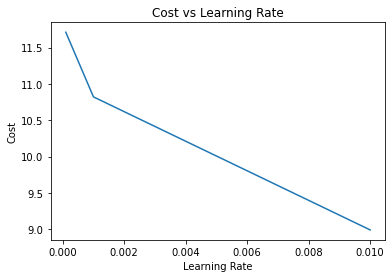

In [49]:
def linear_regression(x, y, learning_rate, w1_current=0, w0_current=0, iterations=600):
  
    for i in range(iterations+1):
        
        y_hat = w0_current + w1_current*x
        cost = sum((y-y_hat)**2)/m             # cost function
        g_w1 = -2/m*sum(x*(y-y_hat))           # derivative of cost wrt w1
        g_w0 = -2/m*sum(y-y_hat)               # derivative of cost wrt w0
        w1_current = w1_current - learning_rate*g_w1      # update w1
        w0_current = w0_current - learning_rate*g_w0      # update w0
    
    return w1_current, w0_current, cost



cost_list = []
learning_rate_list = [0.0001, 0.001, 0.01]
for learning_rate in learning_rate_list:
    w1_current, w0_current, cost = linear_regression(x, y, learning_rate=learning_rate)
    cost_list.append(cost)

plt.plot(learning_rate_list, cost_list)
plt.xlabel('Learning Rate')
plt.ylabel('Cost')
plt.title('Cost vs Learning Rate')
plt.show()    

From the above figure, we can know the best learning rate in this case is 0.01.

### (3.2) Stochastic Gradient Descent

In [64]:
w0, w1 = 0, 0
learning_rate = 0.01

start = time.time()
 
for i in range(5):   # we run 5 epochs
    for j in range(m):    # iterate each instance
        y_hat = w0*x[i] + w1
        cost = sum((y_hat-y[i])**2)/m
        g_w0 = -2/m*sum(x[i]*(y[i]-y_hat))
        g_w1 = -2/m*sum(y[i]-y_hat)
        w0 = w0 - learning_rate*g_w0
        w1 = w1 - learning_rate*g_w1
        print(j, 'iteration:', cost)
end = time.time()
duration = end-start
print('Stochastic Gradient Descent spent', duration, 's')
        



0 iteration: 3.1904996288659793
1 iteration: 3.140264938574457
2 iteration: 3.090821197789982
3 iteration: 3.042155952944729
4 iteration: 2.9942569465533686
5 iteration: 2.9471121141257246
6 iteration: 2.9007095811280568
7 iteration: 2.8550376599921785
8 iteration: 2.810084847171663
9 iteration: 2.7658398202444086
10 iteration: 2.722291435060825
11 iteration: 2.6794287229369096
12 iteration: 2.6372408878915294
13 iteration: 2.595717303927203
14 iteration: 2.5548475123536885
15 iteration: 2.5146212191537205
16 iteration: 2.4750282923902165
17 iteration: 2.436058759654314
18 iteration: 2.397702805553583
19 iteration: 2.3599507692397883
20 iteration: 2.322793141975579
21 iteration: 2.2862205647394904
22 iteration: 2.2502238258686518
23 iteration: 2.214793858738615
24 iteration: 2.179921739479713
25 iteration: 2.145598684729369
26 iteration: 2.1118160494198053
27 iteration: 2.0785653246005777
28 iteration: 2.045838135295397
29 iteration: 2.0136262383926926
30 iteration: 1.9819215205693923


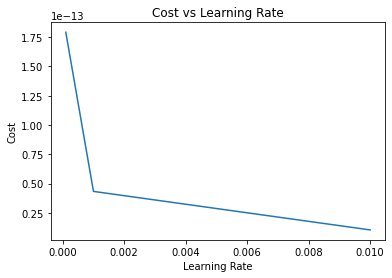

In [71]:
cost_list = []
learning_rate_list = [0.0001, 0.001, 0.01]

for lr in learning_rate_list:
    for j in range(m):    # iterate each instance
        y_hat = w0*x[i] + w1
        cost = sum((y_hat-y[i])**2)/m
        g_w0 = -2/m*sum(x[i]*(y[i]-y_hat))
        g_w1 = -2/m*sum(y[i]-y_hat)
        w0 = w0 - learning_rate*g_w0
        w1 = w1 - learning_rate*g_w1
    cost_list.append(cost)

plt.plot(learning_rate_list, cost_list)   
plt.xlabel('Learning Rate')
plt.ylabel('Cost')
plt.title('Cost vs Learning Rate')
plt.show()


From the above figure, we can know the best learning rate in this case is 0.01.

<b>Analysis</b><br>
The time for batch gradient descent is 0.42s.<br> 
The time for stochastic gradient descent is 0.12s. <br>
So Stochastics is faster.<br>
The minimized cost for batch gradient descent is 8.99, which for stochastic gradient descent can reach 0.0005 (the 4th epoch).<br>
So stochastic gradient descent can be more accurate.